In [6]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("sensor.csv") #loading data

In [8]:
df.info() #checking the features available

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Sensor_ID                       500 non-null    object 
 1   Timestamp                       500 non-null    object 
 2   Voltage (V)                     500 non-null    int64  
 3   Current (A)                     500 non-null    float64
 4   Temperature (°C)                500 non-null    int64  
 5   Power (W)                       500 non-null    float64
 6   Humidity (%)                    500 non-null    int64  
 7   Vibration (m/s²)                500 non-null    float64
 8   Equipment_ID                    500 non-null    object 
 9   Operational Status              500 non-null    object 
 10  Fault Status                    500 non-null    object 
 11  Failure Type                    200 non-null    object 
 12  Last Maintenance Date           500 

In [9]:
df.columns #all the columns name

Index(['Sensor_ID', 'Timestamp', 'Voltage (V)', 'Current (A)',
       'Temperature (°C)', 'Power (W)', 'Humidity (%)', 'Vibration (m/s²)',
       'Equipment_ID', 'Operational Status', 'Fault Status', 'Failure Type',
       'Last Maintenance Date', 'Maintenance Type', 'Failure History',
       'Repair Time (hrs)', 'Maintenance Costs (USD)',
       'Ambient Temperature (°C)', 'Ambient Humidity (%)', 'External Factors',
       'X', 'Y', 'Z', 'Equipment Relationship', 'Equipment Criticality',
       'Fault Detected', 'Predictive Maintenance Trigger'],
      dtype='object')

In [10]:
df.shape  #size of the data

(500, 27)

In [11]:
df.duplicated().sum() #checking if duplicates available or not

np.int64(0)

In [12]:
df.describe() #describing the given data for reference

,Voltage (V),Current (A),Temperature (°C),Power (W),Humidity (%),Vibration (m/s²),Repair Time (hrs),Maintenance Costs (USD),Ambient Temperature (°C),Ambient Humidity (%),X,Y,Z,Fault Detected,Predictive Maintenance Trigger
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.00000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,114.500000,0.700000,24.500000,80.350000,44.500000,0.300000,2.336000,195.000000,22.00000,42.00000,49.500000,24.500000,14.30000,0.334000,0.250000
std,2.875158,0.141563,2.875158,17.293311,2.875158,0.070781,3.402095,28.751579,1.41563,1.41563,28.894979,14.445322,8.62315,0.472112,0.433446
min,110.000000,0.500000,20.000000,55.000000,40.000000,0.200000,0.000000,150.000000,20.00000,40.00000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,112.000000,0.600000,22.000000,66.600000,42.000000,0.250000,0.000000,170.000000,21.00000,41.00000,24.750000,12.000000,7.00000,0.000000,0.000000
50%,114.500000,0.700000,24.500000,80.150000,44.500000,0.300000,0.000000,195.000000,22.00000,42.00000,49.500000,24.500000,14.00000,0.000000,0.000000
75%,117.000000,0.800000,27.000000,94.400000,47.000000,0.350000,6.000000,220.000000,23.00000,43.00000,74.250000,37.000000,22.00000,1.000000,0.250000
max,119.000000,0.900000,29.000000,107.100000,49.000000,0.400000,9.000000,240.000000,24.00000,44.00000,99.000000,49.000000,29.00000,1.000000,1.000000


In [13]:
df.head()  #initial first 5 rows

,Sensor_ID,Timestamp,Voltage (V),Current (A),Temperature (°C),Power (W),Humidity (%),Vibration (m/s²),Equipment_ID,Operational Status,...,Ambient Temperature (°C),Ambient Humidity (%),External Factors,X,Y,Z,Equipment Relationship,Equipment Criticality,Fault Detected,Predictive Maintenance Trigger
0,S_1,2024-01-01 00:00:00,110,0.5,20,55.0,40,0.20,E_1,Operational,...,20,40,Clear Weather,0,0,0,Independent,High,1,1
1,S_2,2024-01-01 01:00:00,111,0.6,21,66.6,41,0.25,E_2,Under Maintenance,...,21,41,Storm,1,1,1,Dependent,Medium,0,0
2,S_3,2024-01-01 02:00:00,112,0.7,22,78.4,42,0.30,E_3,Operational,...,22,42,Clear Weather,2,2,2,Dependent,High,0,0
3,S_4,2024-01-01 03:00:00,113,0.8,23,90.4,43,0.35,E_4,Under Maintenance,...,23,43,Storm,3,3,3,Independent,Medium,1,0
4,S_5,2024-01-01 04:00:00,114,0.9,24,102.6,44,0.40,E_5,Operational,...,24,44,Clear Weather,4,4,4,Dependent,High,0,1


In [14]:
df.isnull().sum() #gives the number of missing value

Sensor_ID                           0
Timestamp                           0
Voltage (V)                         0
Current (A)                         0
Temperature (°C)                    0
Power (W)                           0
Humidity (%)                        0
Vibration (m/s²)                    0
Equipment_ID                        0
Operational Status                  0
Fault Status                        0
Failure Type                      300
Last Maintenance Date               0
Maintenance Type                    0
Failure History                     0
Repair Time (hrs)                   0
Maintenance Costs (USD)             0
Ambient Temperature (°C)            0
Ambient Humidity (%)                0
External Factors                    0
X                                   0
Y                                   0
Z                                   0
Equipment Relationship              0
Equipment Criticality               0
Fault Detected                      0
Predictive M

OBSERVATIONS

1. There are 27 features including temperature, pressure, current
2. There are no duplicate values
3. The feature 'Failure Type' have 300 values missing but the feature is not that important for our model

In [15]:
target_col = 'Fault Detected'


df.drop(columns=[ #dropping unnecessary columns
    'Sensor_ID',
    'Equipment_ID',
    'Failure Type',
    'Last Maintenance Date',
    'Maintenance Type',
    'Operational Status',
    'External Factors',
    'Equipment Relationship'
], errors='ignore', inplace=True)

X = df.drop(columns=[target_col])
y = df[target_col]

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

for col in numeric_features: #removing outliers
    std = X[col].std()
    mean = X[col].mean()
    X = X[(X[col] - mean).abs() <= 3 * std]
    y = y.loc[X.index]  # keep y in sync

numeric_transformer = Pipeline(steps=[ #building a pipeline for numeric features imputation and scaling
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ],
    remainder='drop'  
)

X_processed = preprocessor.fit_transform(X) #applying transformations

X_processed_df = pd.DataFrame(X_processed, columns=numeric_features)
X_processed_df['Timestamp'] = df.loc[X.index, 'Timestamp'].values  # adding Timestamp back
X_processed_df[target_col] = y.values  # adding target back

df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce') # converting Timestamp to datetime

X_processed_df.to_csv("processed_sensor_data_datacamp.csv", index=False)
print("Preprocessing complete. File saved as 'processed_sensor_data_datacamp.csv'")


Preprocessing complete. File saved as 'processed_sensor_data_datacamp.csv'


In [16]:
X_processed_df.head() #getting top 5 values after preprocessing the data

,Voltage (V),Current (A),Temperature (°C),Power (W),Humidity (%),Vibration (m/s²),Repair Time (hrs),Maintenance Costs (USD),Ambient Temperature (°C),Ambient Humidity (%),X,Y,Z,Predictive Maintenance Trigger,Timestamp,Fault Detected
0,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.555556,0.000000,0.00,0.00,0.000000,0.000000,0.000000,1.0,2024-01-01 00:00:00,1
1,0.111111,0.25,0.111111,0.222649,0.111111,0.25,0.000000,0.111111,0.25,0.25,0.010101,0.020408,0.034483,0.0,2024-01-01 01:00:00,0
2,0.222222,0.50,0.222222,0.449136,0.222222,0.50,0.000000,0.222222,0.50,0.50,0.020202,0.040816,0.068966,0.0,2024-01-01 02:00:00,0
3,0.333333,0.75,0.333333,0.679463,0.333333,0.75,0.888889,0.333333,0.75,0.75,0.030303,0.061224,0.103448,0.0,2024-01-01 03:00:00,1
4,0.444444,1.00,0.444444,0.913628,0.444444,1.00,0.000000,0.444444,1.00,1.00,0.040404,0.081633,0.137931,1.0,2024-01-01 04:00:00,0


In [20]:
X_processed_df[target_col].unique()

array([1, 0])

In [21]:
X_processed_df[target_col].nunique()

2

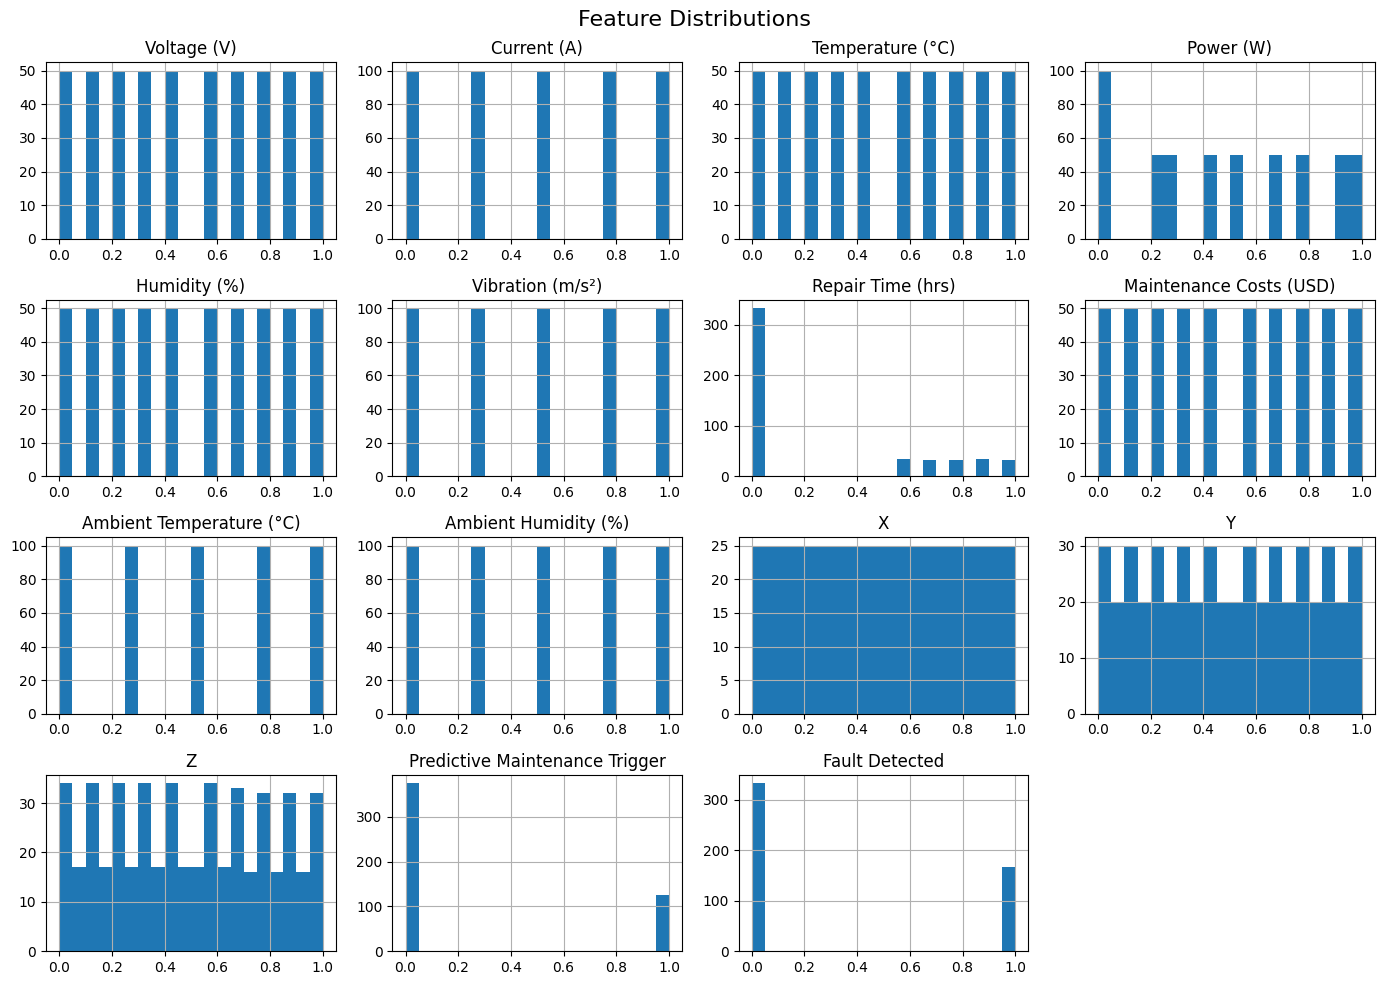

In [17]:


X_processed_df.hist(figsize=(14, 10), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

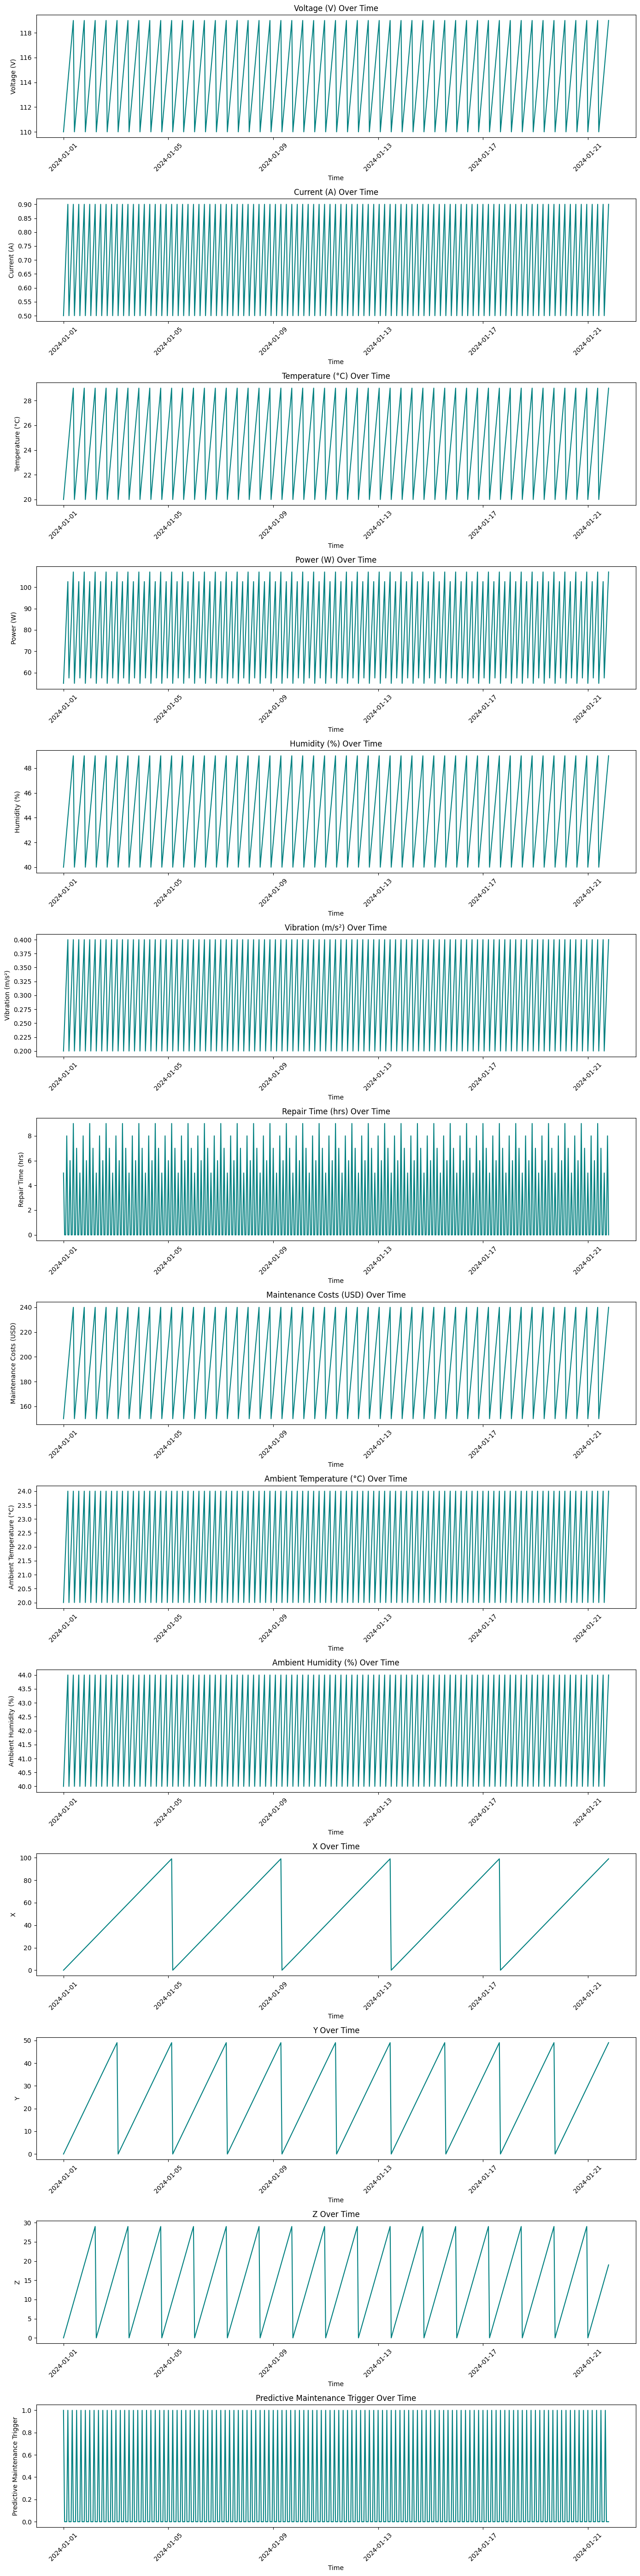

In [22]:

excluded = ['Fault Detected', 'Timestamp']
numeric_cols = [col for col in df.columns if col not in excluded and pd.api.types.is_numeric_dtype(df[col])]


plt.figure(figsize=(14, 4 * len(numeric_cols)))  

for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols), 1, i + 1)
    plt.plot(df['Timestamp'], df[col], label=col, color='teal')
    plt.title(f"{col} Over Time")
    plt.xlabel("Time")
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

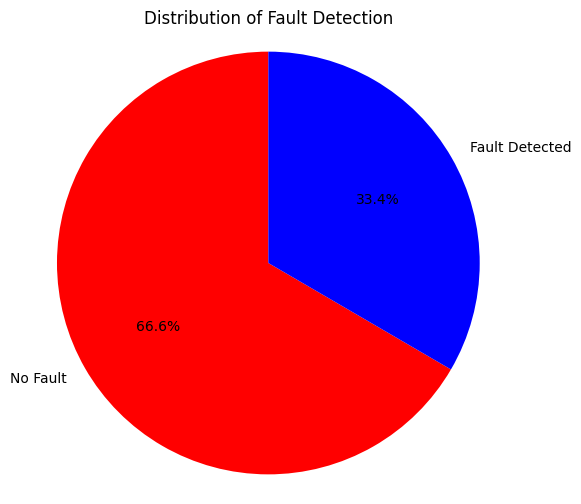

In [24]:
# Count the number of each class in the target column
fault_counts = df['Fault Detected'].value_counts()

# Plot
plt.figure(figsize=(6, 6))
plt.pie(fault_counts, labels=['No Fault', 'Fault Detected'], autopct='%1.1f%%', startangle=90, colors=['red', 'blue'])
plt.title('Distribution of Fault Detection')
plt.axis('equal')  # Equal aspect ratio makes the pie chart circular.
plt.show()